<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-03 11:20:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-08-03 11:20:55 (302 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head(20)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

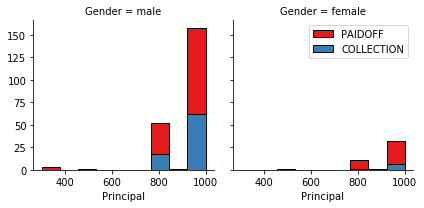

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

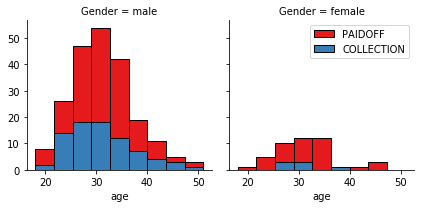

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

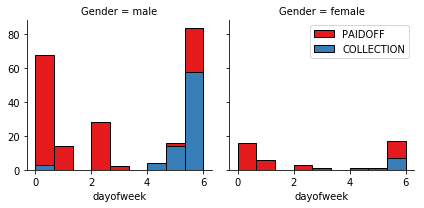

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
Feature['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [134]:
from sklearn.model_selection import train_test_split

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

### Import required libraries used for KMM

In [98]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import scipy
from scipy.stats import sem
import itertools

### Finding the best number of neighbors for our KMM model
The algorithm will interate over a range of nearest neighbors to find the best __K__. __Cross-validation__ will be used to evaluate each __k__. We will chose 5 folds, so each time we will train on __80%__ of the dataset and test on the remaining __20%__. 

In [99]:
Ks = 15 # sets the range of K (nearest nighbors)
kfold = 5
mean_cv_KMM = []
std_cv_KMM = []
Lx = list(range(1, Ks+1))
cv = KFold(n_splits=kfold, random_state=4, shuffle=True)
for n in Lx:  
    #Train Model and Predict  
    clf = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_KMM.append(np.mean(scores))
    std_cv_KMM.append(sem(scores))

### Visulazing the the accuracy for different Ks
Plot model accuracy for the choosen number of Neighbors and showing the +/- 1 standard deviations as light blue.
The best __K__ is shown as a red dot on the plot. 

In [100]:
def plot_function(Lx, Ly, Lstd, x_label, y_label):
    """
    Inputs:
    Lx: list
    Ly: list
    Lstd: list
    x_label: string
    y_label: string
    Return:
    Max accuracy
    Index value
    """
    mean = np.array(Ly)
    std = np.array(Lstd)  
    plt.plot(Lx, mean, 'r')
    plt.fill_between(Lx ,mean - 1 * std, mean + 1 * std, alpha=0.10)
    plt.legend(('Accuracy ', '+/- 1xstd'))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.tight_layout()
    plt.scatter(Lx[mean.argmax()], mean.max(), s=50, marker=u'o', alpha=0.9)
    plt.text(Lx[mean.argmax()], mean.max() + 0.005, str(Lx[mean.argmax()]),
         fontdict={'weight': 'bold', 'size': 9})
    plt.show()
    return mean.max(), Lx[mean.argmax()]

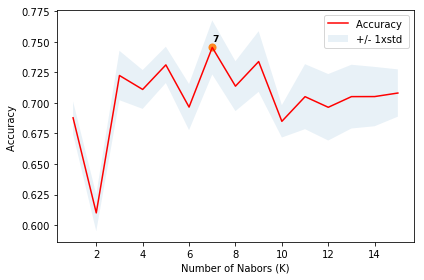

The best accuracy: 0.746 with nighbors=7


In [101]:
Lx = list(range(1, Ks+1))
Ly = mean_cv_KMM
Lstd = std_cv_KMM
x_label = 'Number of Nabors (K)'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with nighbors={1:.0f}").format(Max, Index))

Best average accuracy with __cross-validation__ is __74.6%__ using __7__ Neighbors

In above confusion matrix, of the __55__ actual PAIDOFF, the KNN model predicted that __6__ were COLLECTION, and of the __15__ COLLECTION, it predicted that __9__ was PAIDOFF. The error rate is higher for COLLECTION compared to PAIDOFF. The reason could be the low number of COLLECTION compared to PAIDOFF.

The weighted avg f1-score is __78%__

The jaccard index for accuracy: 0.77 


# Decision Tree

In [107]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [108]:
from sklearn.tree import DecisionTreeClassifier
from io import StringIO ## for Python 3
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'pydotplus'

In [109]:
Depth = 6 # sets the range of tree depth
kfold = 5
mean_cv_Tree = []
std_cv_Tree = []
Lx = list(range(1, Depth+1))
for n in range(1,Depth+1):  
    #Train Model and Predict  
    clf =  DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth = Depth)
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_Tree.append(np.mean(scores))
    std_cv_Tree.append(sem(scores))
print(mean_cv_Tree)

[0.6937060041407868, 0.6934575569358177, 0.716728778467909, 0.6935817805383023, 0.7052173913043478, 0.690848861283644]


### Visulazing the the accuracy for different Depth

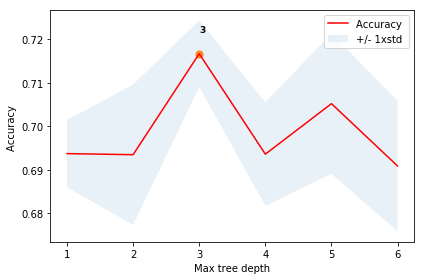

The best accuracy: 0.717 with max tree depth=3


In [110]:
Lx = list(range(1, Depth+1))
Ly = mean_cv_Tree
Lstd = std_cv_Tree
x_label = 'Max tree depth'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with max tree depth={1:.0f}").format(Max, Index))

From above plot it can be seen that the standard deviation is relative high so high performance variation is expected. 

[0 0 0 0 0 0 0 0 0 0 0 0 0]


Let's check the accuracy again

In [112]:
print(("Accuracy for Decision Trees build with training dataset: {0:.3f} ").format(metrics.accuracy_score(y_test,y_pred)))

Accuracy for Decision Trees build with training dataset: 0.600 


In [113]:
### Visualization of decision tree

### Confusion matrix & f1-score

              precision    recall  f1-score   support

  COLLECTION       0.29      0.18      0.22        11
     PAIDOFF       0.68      0.79      0.73        24

   micro avg       0.60      0.60      0.60        35
   macro avg       0.48      0.49      0.48        35
weighted avg       0.56      0.60      0.57        35

Confusion matrix, without normalization
[[19  5]
 [ 9  2]]


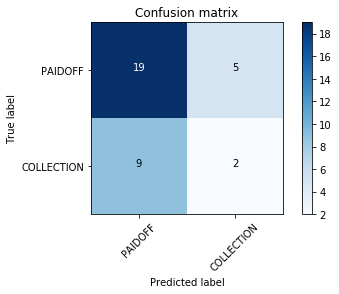

In [114]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize= False,  title='Confusion matrix')

### Jaccard index for accuracy:

In [115]:
jaccard_similarity_score(y_test, y_pred)
print(("The jaccard index for accuracy: {0:.2f} ").format(jaccard_similarity_score(y_test, y_pred)))

The jaccard index for accuracy: 0.60 


# Support Vector Machine

In [116]:
from sklearn import svm

In [135]:
Kernels = ["linear", "poly", "rbf", "sigmoid"] # the different types of kernel functions that are tested
kfold = 5
mean_cv_SVM = []
std_cv_SVM = []
for Kernel in Kernels:  
    #Train Model and Predict  
    clf = svm.SVC(C = 1.0, kernel = Kernel, degree=3, gamma = "scale")
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_SVM.append(np.mean(scores))
    std_cv_SVM.append(sem(scores))
print(mean_cv_SVM)

[0.7484472049689441, 0.7339958592132505, 0.7195859213250517, 0.7167287784679088]


### Visulazing the the accuracy for different kernels

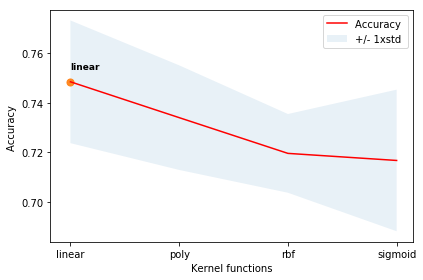

The best accuracy: 0.748 with kernel function: linear


In [136]:
Lx = Kernels
Ly = mean_cv_SVM
Lstd = std_cv_SVM
x_label = 'Kernel functions'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with kernel function: " + str(Index)).format(Max))

### Tuning Gamma for rbf, poly and sigmoid 
Let's see if we can obtain a better performance compared to __linear Kernel__ if we tune gamma

In [137]:
d_mean = {}
d_std = {}
Kernels = ["poly", "rbf", "sigmoid"] # the different types of kernel functions that are tested
cv = KFold(n_splits=kfold, random_state=4, shuffle=True)
gamma_range = np.logspace(-2, -1, 10)
for Kernel in Kernels:
    d_mean[Kernel] = []
    d_std[Kernel] = []
    for Gamma in gamma_range:        
        clf = svm.SVC(C = 1.0, kernel = Kernel, degree=3, gamma = Gamma, coef0 = 0.0)
        scores = cross_val_score(clf,X, y, cv=cv)
        d_mean[Kernel].append(np.mean(scores))
        d_std[Kernel].append(sem(scores))

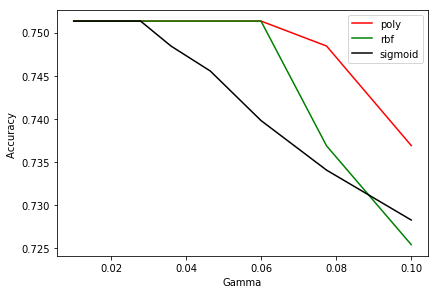

In [138]:
colors = ["red","green","black"]
for Kernel,color in zip(Kernels,colors):
    mean_cv_SVM_plot = np.array(d_mean[Kernel])
    std_cv_SVM_plot = np.array(d_std[Kernel])
    plt.plot(gamma_range, mean_cv_SVM_plot,c = color)

plt.legend(("poly", "rbf", "sigmoid"))
plt.tight_layout()
plt.ylabel('Accuracy ')
plt.xlabel('Gamma')
plt.show()

From above plot it can be seen that tuning Gamma will not increase the accuracy significant, so I will continue using __linear__ kernel 

Let's check the accuracy again

In [140]:
print(("Accuracy for SVM build with training dataset: {0:.3f} ").format(metrics.accuracy_score(y_test,y_pred)))

Accuracy for SVM build with training dataset: 0.686 


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        11
     PAIDOFF       0.69      1.00      0.81        24

   micro avg       0.69      0.69      0.69        35
   macro avg       0.34      0.50      0.41        35
weighted avg       0.47      0.69      0.56        35

Confusion matrix, without normalization
[[24  0]
 [11  0]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


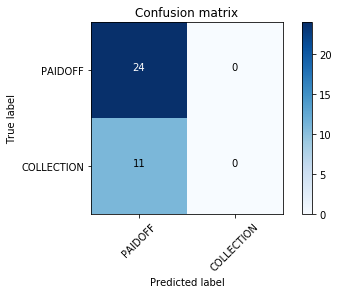

In [141]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize= False,  title='Confusion matrix')

### Jaccard index for accuracy:

In [130]:
jaccard_similarity_score(y_test, y_pred)
print(("The jaccard index for accuracy: {0:.2f} ").format(jaccard_similarity_score(y_test, y_pred)))

The jaccard index for accuracy: 0.69 


# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
Solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"] # the different types of solvers that are tested
c = 0.01
mean_cv_LR = []
std_cv_LR = []
for Solver in Solvers:  
    #Train Model and Predict  
    clf = LogisticRegression(C=c, solver=Solver)
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_LR.append(np.mean(scores))
    std_cv_LR.append(sem(scores))
print(mean_cv_LR)

[0.7513457556935819, 0.7513457556935819, 0.719751552795031, 0.7513457556935819, 0.7513457556935819]


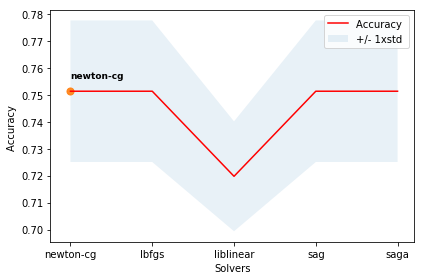

The best accuracy: 0.751 with solver: newton-cg


In [133]:
Lx = Solvers
Ly = mean_cv_LR
Lstd = std_cv_LR
x_label = 'Solvers'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with solver: " + str(Index)).format(Max))

# Train Classification models

### Builds the K Nearest Neighbor model with K=7

In [190]:
koptimal = 7
KMM_model = KNeighborsClassifier(n_neighbors = koptimal).fit(X,y)

### Builds the Decision Trees model with max dept=3

In [200]:
Depth = 3
Tree_model =  DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth = Depth).fit(X,y)

### Builds the Support Vector Machine model with Linear kernel

In [201]:
Kernel = "linear"
SVM_model =  svm.SVC(C = 1.0, kernel = Kernel).fit(X,y)

### Builds the Logistic Regression model with newton-cg solver

In [202]:
Solver = "newton-cg"
LR_model = LogisticRegression(C=0.01, solver=Solver).fit(X,y)

# Model Evaluation using Test set

In [203]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [204]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-08-03 15:03:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-08-03 15:03:54 (391 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [205]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Prepare Feature testset and Label

In [206]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature_test
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
y_test = test_df['loan_status'].values

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:14: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


### Evaluation of K Nearest Neighbor model on test set

#### Confusion matrix & f1-score

In [207]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [208]:
def compute_confusion_matrix(y_test,y_pred, Normalize=False):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=["PAIDOFF", "COLLECTION"])
    np.set_printoptions(precision=2)
    print (classification_report(y_test, y_pred))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize= Normalize,  title='Confusion matrix')

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54

Confusion matrix, without normalization
[[35  5]
 [10  4]]


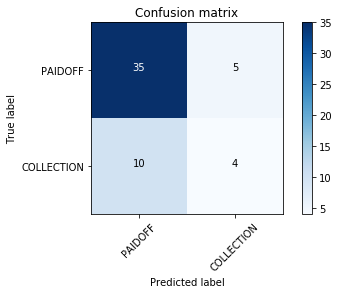

In [209]:
y_pred_KMM = KMM_model.predict(X_test)
compute_confusion_matrix(y_test,y_pred_KMM)

#### Jaccard index for accuracy:

In [210]:
print(("The jaccard index for accuracy: {0:.2f} ").format(jaccard_similarity_score(y_test, y_pred_KMM)))

The jaccard index for accuracy: 0.72 


### Evaluation of Decision Trees model on test set

#### Confusion matrix & f1-score

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

Confusion matrix, without normalization
[[40  0]
 [14  0]]


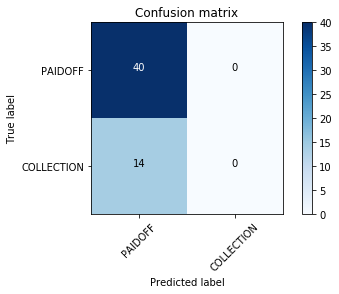

In [211]:
y_pred_TREE = Tree_model.predict(X_test)
compute_confusion_matrix(y_test,y_pred_TREE)

#### Jaccard index for accuracy:

In [199]:
print(("The jaccard index for accuracy: {0:.3f} ").format(jaccard_similarity_score(y_test, y_pred_TREE)))

The jaccard index for accuracy: 0.74 


### Evaluation of Support Vector Machine model on test set

#### Confusion matrix & f1-score

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

Confusion matrix, without normalization
[[40  0]
 [14  0]]


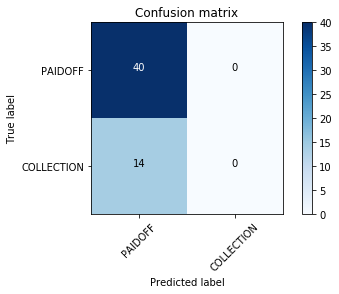

In [212]:
y_pred_SVM = Tree_model.predict(X_test)
compute_confusion_matrix(y_test, y_pred_SVM)

#### Jaccard index for accuracy:

In [214]:
print(("The jaccard index for accuracy: {0:.3f} ").format(jaccard_similarity_score(y_test, y_pred_SVM)))

The jaccard index for accuracy: 0.741 


### Evaluation of Logistic Regression model on test set¶

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

Confusion matrix, without normalization
[[40  0]
 [14  0]]


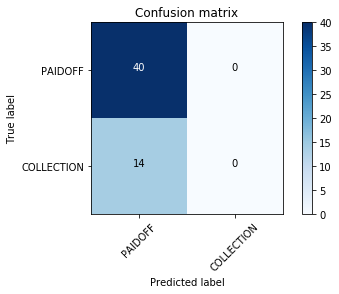

In [215]:
y_pred_LR = LR_model.predict(X_test)
compute_confusion_matrix(y_test, y_pred_SVM)

#### Jaccard index for accuracy:

In [ ]:
print(("The jaccard index for accuracy: {0:.3f} ").format(jaccard_similarity_score(y_test, y_pred_LR)))

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>